Além da acuracidade, é importante avaliar o tempo de execução de um código. Em muitos casos, diferentes abordagens para resolver o mesmo problema podem produzir tempos muito distintos.

Neste exercício, o uso da linguagem Python é obrigatório, utilizando o módulo `time` para medir os tempos de execução.

a) Medindo o tempo de execução

Escreva uma função em Python que calcule a soma dos primeiros N
 inteiros positivos:

S=∑Ni=1i

Implemente duas versões:

1. Versão iterativa: utilizando um laço `for`.
2. Versão analítica: utilizando a fórmula direta S=N(N+1)2
.

Use o comando:

```python
import time
start = time.time()
# código aqui
end = time.time()
print("Tempo de execução:", end - start)
```

para medir o tempo de execução de cada versão para N=106,107,108
.

b) Comparando abordagens com listas

Crie uma lista com os números de 1 a N
 e calcule a soma:

- Usando um laço `for`.
- Usando a função `sum()` do Python.

Meça os tempos de execução para N=106,107
.
Qual abordagem foi mais rápida? Por quê?

c) Visualizando tempos

Monte um gráfico (usando `matplotlib`) comparando os tempos das diferentes abordagens para valores crescentes de N
. Use uma escala log-log para facilitar a análise.

d) (Exploração mais desafiadora)

- Implemente uma versão vetorizada da soma utilizando `numpy.arange()` e `numpy.sum()`.
- Compare o tempo de execução com as outras abordagens para valores grandes de N
.
- Discuta como a otimização interna do NumPy impacta o desempenho.

Reflexão:
Este exercício mostra que não apenas a correção, mas também a eficiência de um código importa. Em Python, soluções vetorizadas ou analíticas costumam ser significativamente mais rápidas do que laços explícitos.

=== Parte a: iterativa vs analítica ===
N=1000000: iterativa = 0.067132s; analítica = 0.000000s
N=10000000: iterativa = 0.828339s; analítica = 0.000000s
N=100000000: iterativa = 8.090112s; analítica = 0.000000s

=== Parte b: somas com lista ===
N=1000000: list+for = 0.084543s; sum() = 0.030626s
N=10000000: list+for = 0.850011s; sum() = 0.449834s

=== Parte c & d: comparação geral ===


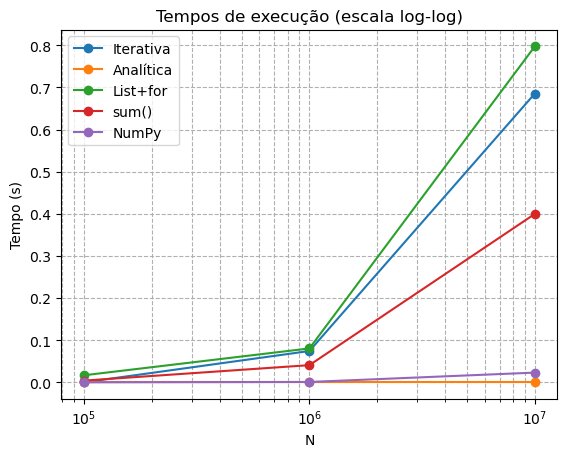

In [14]:
import time
import numpy as np
import matplotlib.pyplot as plt

def soma_iterativa(N):
    s = 0
    for i in range(1, N+1):
        s += i
    return s

def soma_analitica(N):
    return N * (N + 1) // 2

def soma_laco_lista(N):
    lst = list(range(1, N+1))
    s = 0
    for x in lst:
        s += x
    return s

def sum_builtin(N):
    lst = list(range(1, N+1))
    return sum(lst)

def sum_numpy(N):
    arr = np.arange(1, N+1)
    return arr.sum()

# Parte a
print("=== Parte a: iterativa vs analítica ===")
for N in [10**6, 10**7, 10**8]:
    start = time.time()
    soma_iterativa(N)
    ti = time.time() - start
    start = time.time()
    soma_analitica(N)
    ta = time.time() - start
    print(f"N={N}: iterativa = {ti:.6f}s; analítica = {ta:.6f}s")

# Parte b
print("\n=== Parte b: somas com lista ===")
for N in [10**6, 10**7]:
    start = time.time()
    soma_laco_lista(N)
    t_loop = time.time() - start
    start = time.time()
    sum_builtin(N)
    t_sum = time.time() - start
    print(f"N={N}: list+for = {t_loop:.6f}s; sum() = {t_sum:.6f}s")

# Parte c e d
print("\n=== Parte c & d: comparação geral ===")
Ns = [10**5, 10**6, 10**7]
tempos = {'Iterativa': [], 'Analítica': [], 'List+for': [], 'sum()': [], 'NumPy': []}
for N in Ns:
    start = time.time(); soma_iterativa(N); tempos['Iterativa'].append(time.time()-start)
    start = time.time(); soma_analitica(N); tempos['Analítica'].append(time.time()-start)
    start = time.time(); soma_laco_lista(N); tempos['List+for'].append(time.time()-start)
    start = time.time(); sum_builtin(N); tempos['sum()'].append(time.time()-start)
    start = time.time(); sum_numpy(N); tempos['NumPy'].append(time.time()-start)

plt.figure()
for metodo, tms in tempos.items():
    plt.plot(Ns, tms, marker='o', label=metodo)
plt.xscale('log')
plt.xlabel('N'); plt.ylabel('Tempo (s)')
plt.title('Tempos de execução (escala log-log)')
plt.legend(); plt.grid(True, which='both', ls='--')
plt.show()


Apesar do poder dos computadores modernos, somar uma série numérica com muitos termos pode exigir cuidado com a ordem das operações. Em ponto flutuante, a ordem em que somamos os termos pode afetar significativamente a acuracidade do resultado.

Neste exercício, o uso da linguagem Python é obrigatório. Utilize `numpy` e `matplotlib` conforme necessário.

a) Soma crescente e decrescente

Considere a seguinte soma harmônica finita:

Sup=∑Nn=11n,Sdown=∑1n=N1n

Matematicamente, ambas devem produzir o mesmo resultado para qualquer N
. No entanto, ao utilizar números em ponto flutuante, pode haver diferenças devido a erros de arredondamento acumulados.

Tarefa:

- Escreva um programa em Python que calcule Sup
 e Sdown
 como função de N
.
- Calcule o erro relativo entre as duas somas usando a expressão:

Erro relativo=|Sup−Sdown||Sup|+|Sdown|

b) Análise gráfica do erro

- Faça um gráfico log-log do erro relativo versus N
, para N
 variando de 10
 até 107
.
- Interprete o comportamento do gráfico. Você observa uma região linear?

c) Interpretação e explicação

- Por que a soma decrescente (do maior para o menor termo) tende a ser mais precisa?
- Relacione isso com o fato de que, em ponto flutuante, adicionar termos muito pequenos a valores grandes pode não alterar o resultado devido à limitação do número de dígitos significativos.

d) (Exploração mais desafiadora)

Implemente uma terceira estratégia de soma chamada "soma compensada de Kahan". Ela visa reduzir os erros de arredondamento acumulados. A fórmula funciona com uma variável de compensação que armazena os erros perdidos durante cada adição.

- Reimplemente a soma crescente usando o algoritmo de Kahan.
- Compare os valores obtidos com os das somas simples crescentes e decrescentes.
- Plote os erros relativos das três versões em um mesmo gráfico log-log para comparação.

Reflexão:
Este exercício mostra que a ordem em que realizamos somas pode afetar o resultado numérico, mesmo em operações aparentemente simples. Em particular, somar do menor para o maior pode levar à perda de informação, enquanto somar do maior para o menor tende a preservar melhor a precisão dos primeiros termos. Algoritmos como o de Kahan são importantes ferramentas numéricas para mitigar esse tipo de erro.
























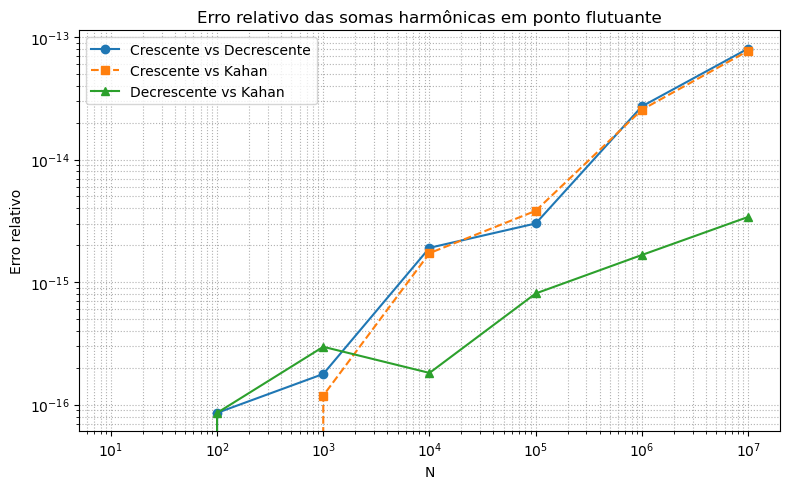

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo valores de N (de 10^1 a 10^7)
Ns = [10**k for k in range(1, 8)]

# Listas para armazenar somas
s_asc_list = []
s_down_list = []
s_kahan_list = []

# Cálculo das somas
for N in Ns:
    # Soma crescente e soma de Kahan
    s_asc = 0.0
    s_kahan = 0.0
    c = 0.0  # compensação para Kahan
    for n in range(1, N + 1):
        x = 1.0 / n
        # Soma clássica
        s_asc += x
        # Soma de Kahan
        y = x - c
        t = s_kahan + y
        c = (t - s_kahan) - y
        s_kahan = t
    s_asc_list.append(s_asc)
    s_kahan_list.append(s_kahan)
    
    # Soma decrescente
    s_down = 0.0
    for n in range(N, 0, -1):
        s_down += 1.0 / n
    s_down_list.append(s_down)

# Cálculo dos erros relativos entre as versões
err_cd = [abs(a - d) / (abs(a) + abs(d)) for a, d in zip(s_asc_list, s_down_list)]
err_ak = [abs(a - k) / (abs(a) + abs(k)) for a, k in zip(s_asc_list, s_kahan_list)]
err_dk = [abs(d - k) / (abs(d) + abs(k)) for d, k in zip(s_down_list, s_kahan_list)]

# Plot log-log dos erros
plt.figure(figsize=(8, 5))
plt.loglog(Ns, err_cd, 'o-', label='Crescente vs Decrescente')
plt.loglog(Ns, err_ak, 's--', label='Crescente vs Kahan')
plt.loglog(Ns, err_dk, '^-', label='Decrescente vs Kahan')
plt.xlabel('N'); plt.ylabel('Tempo (s)')
plt.ylabel('Erro relativo')
plt.title('Erro relativo das somas harmônicas em ponto flutuante')
plt.legend()
plt.grid(True, which='both', linestyle=':')
plt.tight_layout()
plt.show()


A representação de números reais em computadores usa o formato de ponto flutuante, o que pode introduzir erros de arredondamento e perda de precisão. Esses efeitos podem se tornar críticos em certas situações.

Neste exercício, o uso da linguagem Python é obrigatório. Utilize as bibliotecas `math`, `numpy` e `matplotlib` sempre que necessário. Em especial, utilize `numpy.float32` e `numpy.float64` para explorar diferentes níveis de precisão.

a)
Escreva um programa em Python que calcule a seguinte expressão, variando o valor de x
 em torno de zero (por exemplo, de 10−1
 até 10−15
):

f(x)=1−cos(x)x2

Compare os valores obtidos com o valor limite teórico da função conforme x→0
, que é:

limx→01−cos(x)x2=12

Utilize gráficos em Python para visualizar o comportamento da função à medida que x
 se aproxima de 0. O que você observa para valores muito pequenos de x
? Como o cancelamento numérico afeta o resultado?

b)
Reescreva a função anterior em Python utilizando a identidade trigonométrica:

1−cos(x)=2sin2(x2)

E recalcule a função como:

f(x)=2sin2(x2)x2

Compare os resultados obtidos com os da letra anterior utilizando o mesmo gráfico. Há melhora na precisão numérica? Explique por que isso acontece em seu código ou relatório.

c)
Inclua em seu script Python um comentário explicando com suas palavras o que é cancelamento catastrófico em ponto flutuante. Dê também um exemplo adicional (em Python) onde isso pode ocorrer, além do exemplo envolvendo cosseno.

d) (Exploração adicional: Precisão simples vs. dupla)

- Refaça os cálculos das expressões das letras (a) e (b) utilizando explicitamente os tipos `numpy.float32` e `numpy.float64`.
- Plote os erros relativos entre os valores numéricos e o valor teórico 12
.
- Qual tipo de precisão apresenta melhor estabilidade numérica?
- Comente as implicações do uso de cada tipo de precisão em aplicações reais.

Reflexão:
Este exercício mostra que expressões matematicamente equivalentes podem se comportar de maneira muito diferente no computador. A escolha de como escrever a fórmula e o tipo de precisão usada podem afetar fortemente os resultados. Em ciência computacional, compreender e controlar o erro numérico é essencial para garantir resultados confiáveis.
























Exemplo de cancelamento catastrófico (subtração direta):
 Float64: 1.1102230246251565e-15
 Float32: 1.1920929e-07

Exemplo de cancelamento catastrófico (raízes quadradas):
 Float64: 0.0
 Float32: 0.0


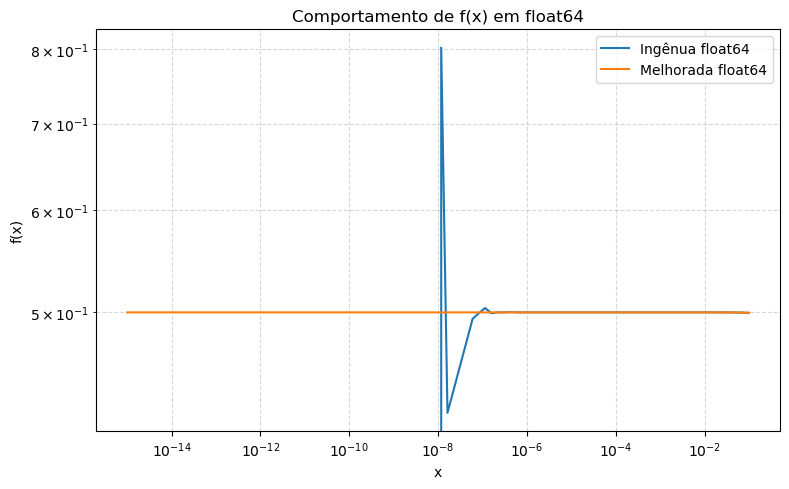

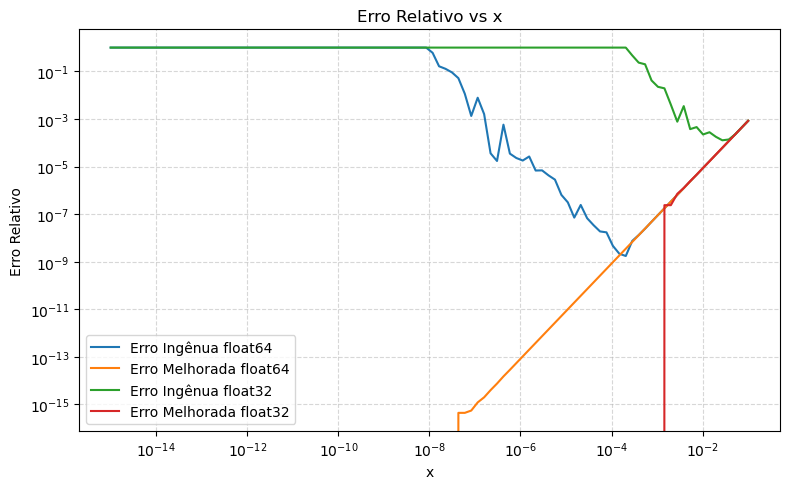

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------------------------------------------
# CANCELAMENTO CATASTRÓFICO EM PONTO FLUTUANTE
# --------------------------------------------------------------------
# Quando subtraímos dois números muito próximos em ponto flutuante, a maior parte
# dos dígitos significativos coincide e “se cancela”, restando apenas os bits menos
# confiáveis. O resultado pode perder precisão, ficar muito impreciso, ou até zero.
#
# Exemplo original: (1 - cos(x)) / x^2 sofre cancelamento quando x é muito pequeno.
#
# Exemplo adicional abaixo: sqrt(x + eps) - sqrt(x) para x grande e eps pequeno.
# --------------------------------------------------------------------

# --- Exemplo 1: subtração direta de valores próximos ---
a64 = np.float64(1.000000000000001)
b64 = np.float64(1.0)
diff64 = a64 - b64

a32 = np.float32(1.0000001)
b32 = np.float32(1.0)
diff32 = a32 - b32

print("Exemplo de cancelamento catastrófico (subtração direta):")
print(" Float64:", diff64)  # mantém ~15 dígitos: ≈1.11e-15
print(" Float32:", diff32)  # mantém ~7 dígitos: ≈1.19e-07

# --- Exemplo 2 (adicional): diferença de raízes quadradas muito próximas ---
def diff_sqrt(x, eps, dtype):
    xv = dtype(x)
    ep = dtype(eps)
    return np.sqrt(xv + ep) - np.sqrt(xv)

x_val = 1e16
eps    = 1.0
diff2_64 = diff_sqrt(x_val, eps, np.float64)
diff2_32 = diff_sqrt(x_val, eps, np.float32)

print("\nExemplo de cancelamento catastrófico (raízes quadradas):")
print(" Float64:", diff2_64)  # frequentemente 0.0 por cancelamento
print(" Float32:", diff2_32)  # idem, em precisão ainda menor

# Dica de correção: reescreva a diferença de raízes como
#    sqrt(x+eps) - sqrt(x) = eps / (sqrt(x+eps) + sqrt(x))
# para evitar a subtração direta.

# --------------------------------------------------------------------
# Definição das funções para f(x)
# --------------------------------------------------------------------
def f_ingenua(x):
    return (1 - np.cos(x)) / x**2

def f_melhorada(x):
    return 2 * np.sin(x/2)**2 / x**2

# Geração dos valores de x de 1e-1 até 1e-15
x = np.logspace(-1, -15, num=100)

# Cálculos em precisão dupla (float64)
x64 = x.astype(np.float64)
f_ingenua64   = f_ingenua(x64)
f_melhorada64 = f_melhorada(x64)

# Cálculos em precisão simples (float32)
x32 = x.astype(np.float32)
f_ingenua32   = f_ingenua(x32).astype(np.float32)
f_melhorada32 = f_melhorada(x32).astype(np.float32)

# Valor teórico do limite
valor_teorico = 0.5

# Cálculo dos erros relativos
erro_ingenua64    = np.abs(f_ingenua64   - valor_teorico) / valor_teorico
erro_melhorada64  = np.abs(f_melhorada64 - valor_teorico) / valor_teorico
erro_ingenua32    = np.abs(f_ingenua32   - valor_teorico) / valor_teorico
erro_melhorada32  = np.abs(f_melhorada32 - valor_teorico) / valor_teorico

# Gráfico 1: f(x) vs x em float64
plt.figure(figsize=(8,5))
plt.loglog(x, f_ingenua64, label='Ingênua float64')
plt.loglog(x, f_melhorada64, label='Melhorada float64')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comportamento de f(x) em float64')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Gráfico 2: Erro relativo vs x para todas as versões
plt.figure(figsize=(8,5))
plt.loglog(x, erro_ingenua64,   label='Erro Ingênua float64')
plt.loglog(x, erro_melhorada64, label='Erro Melhorada float64')
plt.loglog(x, erro_ingenua32,   label='Erro Ingênua float32')
plt.loglog(x, erro_melhorada32, label='Erro Melhorada float32')
plt.xlabel('x')
plt.ylabel('Erro Relativo')
plt.title('Erro Relativo vs x')
plt.legend()
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()
